In [1]:
import pandas as pd 
from utils import transform_data, int_to_datetime, get_null_values

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv("230722.csv")

column_names = [
    'GlobalEventID',
    'Day',
    'MonthYear',
    'Year',
    'FractionDate',
    'Actor1Code',
    'Actor1Name',
    'Actor1CountryCode',
    'Actor1KnownGroupCode',
    'Actor1EthnicCode',
    'Actor1Religion1Code',
    'Actor1Religion2Code',
    'Actor1Type1Code',
    'Actor1Type2Code',
    'Actor1Type3Code',
    'Actor2Code',
    'Actor2Name',
    'Actor2CountryCode',
    'Actor2KnownGroupCode',
    'Actor2EthnicCode',
    'Actor2Religion1Code',
    'Actor2Religion2Code',
    'Actor2Type1Code',
    'Actor2Type2Code',
    'Actor2Type3Code',
    'IsRootEvent',
    'EventCode',
    'EventBaseCode',
    'EventRootCode',
    'QuadClass',
    'GoldsteinScale',
    'NumMentions',
    'NumSources',
    'NumArticles',
    'AvgTone',
    'Actor1Geo_Type',
    'Actor1Geo_FullName',
    'Actor1Geo_CountryCode',
    'Actor1Geo_ADM1Code',
    'Actor1Geo_Lat',
    'Actor1Geo_Long',
    'Actor1Geo_FeatureID',
    'Actor2Geo_Type',
    'Actor2Geo_FullName',
    'Actor2Geo_CountryCode',
    'Actor2Geo_ADM1Code',
    'Actor2Geo_Lat',
    'Actor2Geo_Long',
    'Actor2Geo_FeatureID',
    'DateAdded',
    'SourceURL'
        ]

data = transform_data(data, column_names)

data = int_to_datetime(data, "day")
data = int_to_datetime(data, "dateadded")

# Let use small segment of the dataset
data_sm = data[data['year']==2022]

data_lm = data[data['year']!=2022]

# columns = data_sm.columns.tolist()
# columns.remove('quadclass')
# columns.append('quadclass')

# data_sm = data_sm[columns]

data_lm.head()

,globaleventid,day,monthyear,year,fractiondate,actor1code,actor1name,actor1countrycode,actor1knowngroupcode,actor1ethniccode,actor1religion1code,actor1religion2code,actor1type1code,actor1type2code,actor1type3code,actor2code,actor2name,actor2countrycode,actor2knowngroupcode,actor2ethniccode,actor2religion1code,actor2religion2code,actor2type1code,actor2type2code,actor2type3code,isrootevent,eventcode,eventbasecode,eventrootcode,quadclass,goldsteinscale,nummentions,numsources,numarticles,avgtone,actor1geo_type,actor1geo_fullname,actor1geo_countrycode,actor1geo_adm1code,actor1geo_lat,actor1geo_long,actor1geo_featureid,actor2geo_type,actor2geo_fullname,actor2geo_countrycode,actor2geo_adm1code,actor2geo_lat,actor2geo_long,actor2geo_featureid,dateadded,sourceurl
13,1116435795,2023-06-22,202306,2023,2023.4712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUS,COMPANY,NaN,NaN,NaN,NaN,NaN,BUS,NaN,NaN,0,40,40,4,Verbal Cooperation,1.0,5,1,5,1.118963,0,NaN,NaN,NaN,NaN,NaN,NaN,3,"Fort Smith, Arkansas, United States",US,USAR,35.3859,-94.3985,76952,2023-07-22,https://www.kuaf.com/show/ozarks-at-large/2023...
14,1116435796,2023-06-22,202306,2023,2023.4712,AFR,AFRICA,AFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,43,43,4,Verbal Cooperation,2.8,4,1,4,0.790514,1,Russia,RS,RS,60.0000,100.0000,RS,1,Russia,RS,RS,60.0000,100.0000,RS,2023-07-22,https://www.beijingbulletin.com/news/273906652...
15,1116435797,2023-06-22,202306,2023,2023.4712,AFR,AFRICA,AFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RUS,RUSSIAN,RUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,43,43,4,Verbal Cooperation,2.8,10,3,10,-0.491013,4,"Pretoria, Gauteng, South Africa",SF,SF06,-25.7069,28.2294,-1273769,4,"Pretoria, Gauteng, South Africa",SF,SF06,-25.7069,28.2294,-1273769,2023-07-22,https://www.beijingbulletin.com/news/273906652...
16,1116435798,2023-06-22,202306,2023,2023.4712,AFR,AFRICA,AFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RUS,RUSSIAN,RUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,43,43,4,Verbal Cooperation,2.8,2,1,2,0.790514,1,Russia,RS,RS,60.0000,100.0000,RS,1,Russia,RS,RS,60.0000,100.0000,RS,2023-07-22,https://www.beijingbulletin.com/news/273906652...
17,1116435799,2023-06-22,202306,2023,2023.4712,AFR,AFRICA,AFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RUSGOV,RUSSIAN,RUS,NaN,NaN,NaN,NaN,GOV,NaN,NaN,1,43,43,4,Verbal Cooperation,2.8,18,3,18,-0.491013,4,"Pretoria, Gauteng, South Africa",SF,SF06,-25.7069,28.2294,-1273769,4,"Pretoria, Gauteng, South Africa",SF,SF06,-25.7069,28.2294,-1273769,2023-07-22,https://www.beijingbulletin.com/news/273906652...


In [3]:
new_data = data_lm[
[      'fractiondate',
       'year',
       'monthyear',
       'actor1code', 
        'actor1name', 
        'actor1geo_type',
        'actor1geo_long',
        'actor1geo_lat',
        'actor2code', 
        'actor2name', 
        'actor2geo_type',
        'actor2geo_long',
        'actor2geo_lat',
        'isrootevent',
        'eventcode',
        'eventrootcode',
        'goldsteinscale',
        'nummentions',
        'numsources',
        'avgtone',
        'quadclass'
  ]
]


new_data.head() 

,fractiondate,year,monthyear,actor1code,actor1name,actor1geo_type,actor1geo_long,actor1geo_lat,actor2code,actor2name,actor2geo_type,actor2geo_long,actor2geo_lat,isrootevent,eventcode,eventrootcode,goldsteinscale,nummentions,numsources,avgtone,quadclass
13,2023.4712,2023,202306,NaN,NaN,0,NaN,NaN,BUS,COMPANY,3,-94.3985,35.3859,0,40,4,1.0,5,1,1.118963,Verbal Cooperation
14,2023.4712,2023,202306,AFR,AFRICA,1,100.0000,60.0000,NaN,NaN,1,100.0000,60.0000,1,43,4,2.8,4,1,0.790514,Verbal Cooperation
15,2023.4712,2023,202306,AFR,AFRICA,4,28.2294,-25.7069,RUS,RUSSIAN,4,28.2294,-25.7069,1,43,4,2.8,10,3,-0.491013,Verbal Cooperation
16,2023.4712,2023,202306,AFR,AFRICA,1,100.0000,60.0000,RUS,RUSSIAN,1,100.0000,60.0000,0,43,4,2.8,2,1,0.790514,Verbal Cooperation
17,2023.4712,2023,202306,AFR,AFRICA,4,28.2294,-25.7069,RUSGOV,RUSSIAN,4,28.2294,-25.7069,1,43,4,2.8,18,3,-0.491013,Verbal Cooperation


In [4]:
## 1. Import RegressionExperiment and init the class

In [5]:
from pycaret.regression import RegressionExperiment

In [6]:
reg_exp = RegressionExperiment()
reg_exp.setup(new_data, target= 'nummentions', session_id = 223)

,Description,Value
0,Session id,223
1,Target,nummentions
2,Target type,Regression
3,Original data shape,"(87552, 21)"
4,Transformed data shape,"(87552, 34)"
5,Transformed train set shape,"(61286, 34)"
6,Transformed test set shape,"(26266, 34)"
7,Ordinal features,1
8,Numeric features,12
9,Categorical features,8


In [7]:
### 2. Compare baseline models 

In [8]:
best = reg_exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,7.1072,971.7544,30.7220,0.6642,0.7049,1.3150,7.8420
lr,Linear Regression,7.4204,1125.7411,33.0324,0.6264,0.7079,1.0732,0.7970
ridge,Ridge Regression,7.4197,1125.7176,33.0320,0.6264,0.7076,1.0730,0.2770
br,Bayesian Ridge,7.4039,1125.7355,33.0322,0.6264,0.7066,1.0764,0.3320
en,Elastic Net,7.3649,1133.0863,33.1390,0.6242,0.6787,1.1509,0.3000
lasso,Lasso Regression,7.3717,1133.9014,33.1559,0.6235,0.6786,1.1485,0.2990
llar,Lasso Least Angle Regression,7.3717,1133.9015,33.1559,0.6235,0.6786,1.1485,0.2800
omp,Orthogonal Matching Pursuit,7.3207,1133.4790,33.1510,0.6235,0.6704,1.1371,0.2590
gbr,Gradient Boosting Regressor,7.4531,1182.7314,33.7733,0.6089,0.7222,1.3741,3.9150
knn,K Neighbors Regressor,8.2201,1251.2758,34.8129,0.5846,0.7963,1.3226,0.9470


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

### Analyse Model 
The plot_model function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

In [9]:
#### plot residuals 

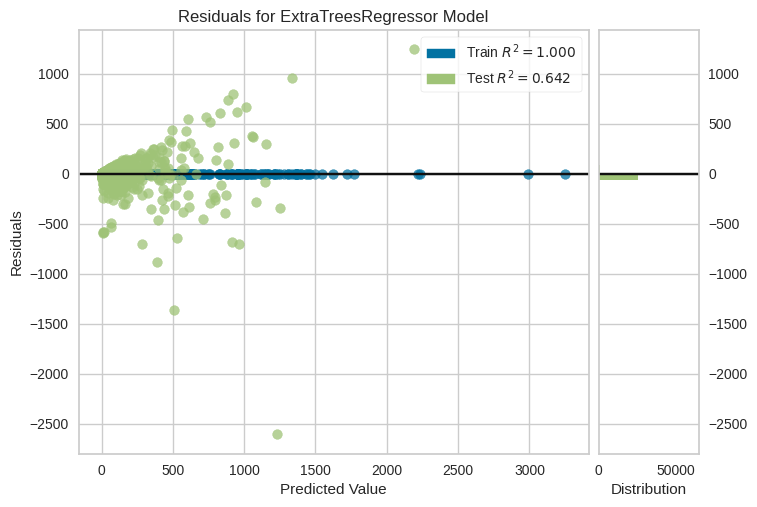

In [10]:
reg_exp.plot_model(best, plot='residuals')

In [11]:
#### Plot error 

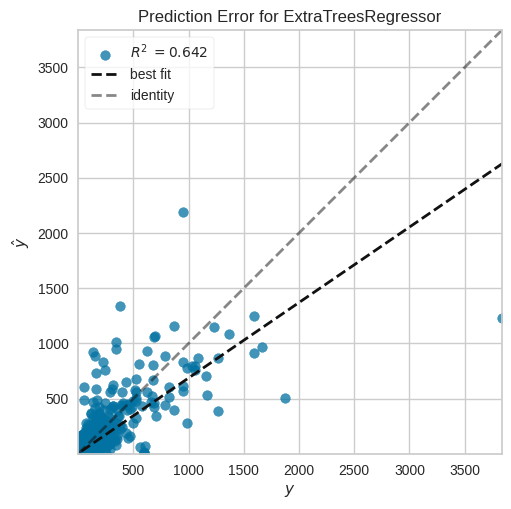

In [12]:
reg_exp.plot_model(best, plot = 'error')

In [13]:
#### Plot feature importance

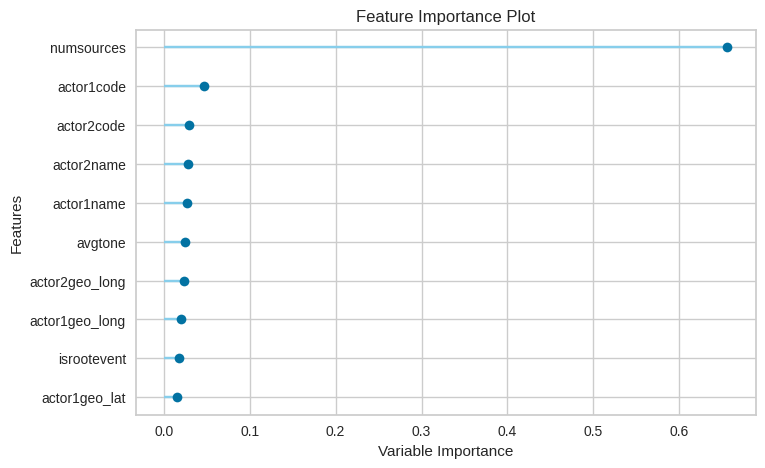

In [14]:
reg_exp.plot_model(best, plot='feature')

In [15]:
# check docstring to see available plots 
# help(plot_model)

An alternate to plot_model function is evaluate_model

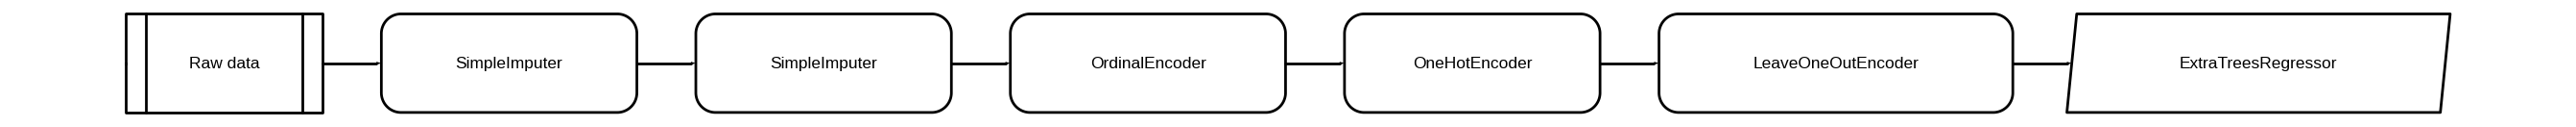

In [16]:
reg_exp.evaluate_model(best)

### Prediction
The predict_model function returns prediction_label as new column to the input dataframe. When data is None (default), it uses the test set (created during the setup function) for scoring.

In [17]:
#### predict on the test set 

In [18]:
holdout_pred = reg_exp.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,5.2705,1002.9253,31.6690,0.6425,0.4999,0.6888


In [19]:
holdout_pred.head()

,fractiondate,year,monthyear,actor1code,actor1name,actor1geo_type,actor1geo_long,actor1geo_lat,actor2code,actor2name,...,actor2geo_lat,isrootevent,eventcode,eventrootcode,goldsteinscale,numsources,avgtone,quadclass,nummentions,prediction_label
56143,2023.553345,2023,202307,GBR,UNITED KINGDOM,4,-1.783330,51.700001,GOV,PRINCE,...,51.700001,1,36,3,4.0,1,1.671733,Verbal Cooperation,2,2.58
62156,2023.553345,2023,202307,USA,UNITED STATES,3,-118.327003,34.098301,NaN,NaN,...,-21.100000,1,10,1,0.0,1,-0.250627,Verbal Cooperation,1,2.63
81585,2023.553345,2023,202307,USA,TEXAS,2,-97.647499,31.106001,NaN,NaN,...,25.683300,0,84,8,7.0,1,2.936857,Material Cooperation,13,5.28
61106,2023.553345,2023,202307,MED,PUBLISHER,0,NaN,NaN,NaN,NaN,...,NaN,1,190,19,-10.0,9,0.366028,Material Conflict,65,80.50
8558,2023.553345,2023,202307,USA,PENNSYLVANIA,2,-77.264000,40.577301,EDU,SCHOOL,...,40.577301,0,125,12,-5.0,1,-1.845820,Verbal Conflict,10,9.07
